# 3주차 Clustering 정규세션 과제 - 16기 김주호

## Clustering 해보기
### 1. Preprocessing / EDA
지금까지 배운 내용을 토대로 해당 데이터에 대해 자유롭게 전처리와 EDA를 진행해주세요.
### 2. Clustering 
수업 내용 및 실습 자료를 참고하여 클러스터링을 자유롭게 진행해주세요. 한 알고리즘에 대해 파라미터를 바꿔가며 비교를 해도 되고, 여러 알고리즘의 결과를 비교해도 됩니다.
### 3. Evaluation
결과에 대한 평가를 진행하고, 나름의 해석을 달아주세요.

**데이터:** [Mall Customer Segmentation Data| Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

---

## 데이터 불러오기

In [36]:
import pandas as pd
df = pd.read_csv("C:/Users/xnote/Desktop/투빅스/3주차/week3_KNN_Clustering/과제/Mall_Customers.csv", index_col = 0)
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [38]:
df=df.reset_index(drop=True)

In [39]:
print(df.Gender.value_counts())
df.describe()

Female    112
Male       88
Name: Gender, dtype: int64


,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


## EDA & Preprocessing

In [40]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [41]:
# Gender 0,1로 레이블 인코딩하기
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df.Gender.value_counts()

0    112
1     88
Name: Gender, dtype: int64

각 변수별 분포 시각화

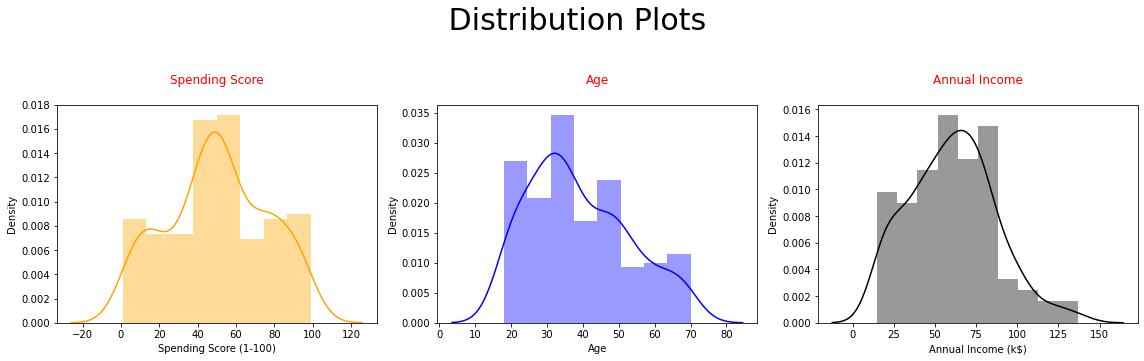

In [42]:
# 각 변수별 분포 확인
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(16,12))

# Spending Score
plt.subplot(3,3,1)
plt.title('Spending Score\n', color='r')
sns.distplot(df['Spending Score (1-100)'], color='orange')

# Age
plt.subplot(3,3,2)
plt.title('Age\n', color='r')
sns.distplot(df['Age'], color='blue')

# Annual Income 
plt.subplot(3,3,3)
plt.title('Annual Income\n', color='r')
sns.distplot(df['Annual Income (k$)'], color='black')

plt.suptitle(' Distribution Plots\n',size = 30)
plt.tight_layout()

In [45]:
spending_score_male = 0
spending_score_female = 0

for i in range(len(df)):
    if df.loc[i,'Gender'] == 1:
        spending_score_male += df['Spending Score (1-100)'][i]
    if df.loc[i,'Gender'] == 0:
        spending_score_female += df['Spending Score (1-100)'][i]

list_spending_mf=[spending_score_male,spending_score_female]
print(list_spending_mf)
series_spending_mf=pd.Series(data=list_spending_mf)

[4269, 5771]


성별 소비점수 시각화

<AxesSubplot:title={'center':'Total Spending Score\n'}>

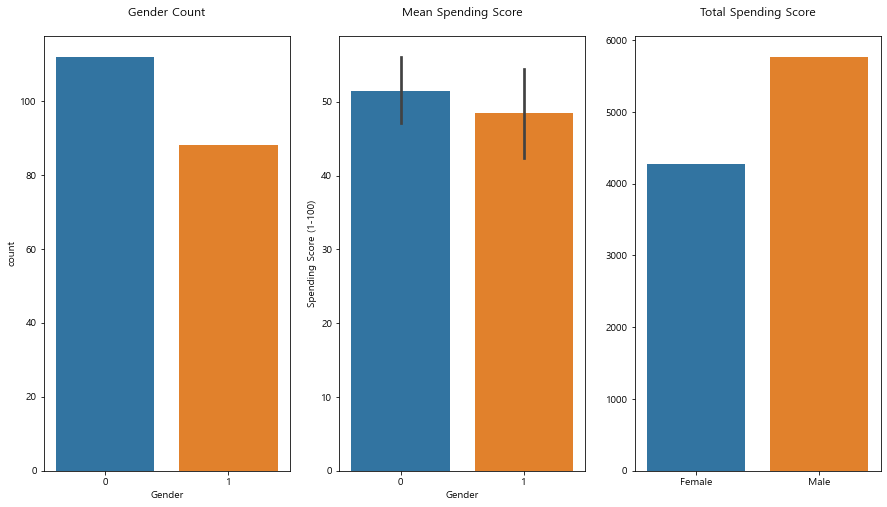

In [162]:
fig=plt.figure(figsize=(15,8))
# gender
plt.subplot(1,3,1)
plt.title('Gender Count\n')
sns.countplot(x='Gender',data=df)

# gender별 Spending Score 평균
plt.subplot(1,3,2)
plt.title('Mean Spending Score\n')
sns.barplot(x='Gender',y='Spending Score (1-100)',data=df)

# gender별 Spending Score 총합
plt.subplot(1,3,3)
plt.title('Total Spending Score\n')
sns.barplot(x=['Female','Male'],y=series_spending_mf)

pairplot()을 통해 대각선에는 각 변수별 히스토그램으로, 나머지 칸에는 두 변수간 관계를 산점도로 시각화
- annual income & spending score 두 변수가 군집화하기 좋아보임

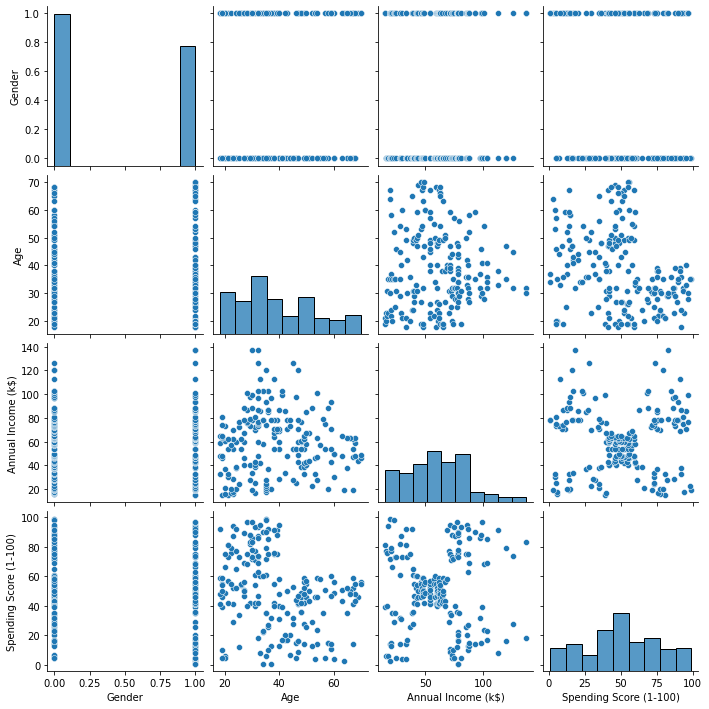

In [68]:
sns.pairplot(df)

## 군집화 실습
### 1. 계층적 군집화

In [71]:
# 기계학습 모델(군집화) 생성, 학습, 평가
from sklearn.model_selection import train_test_split
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN

# 시각화 & 편의용
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')

**Distance 계산법: Single, Average, Complete, Ward**

* **Single Linkage**

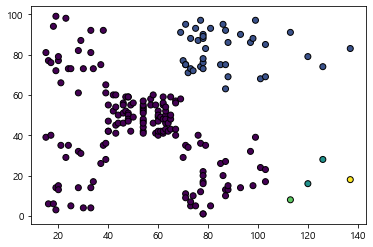

In [82]:
model = AgglomerativeClustering(linkage='single', affinity='euclidean', n_clusters=5)
cluster=model.fit_predict(df)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], linewidth = 1, c = cluster, edgecolor = 'black')
plt.show()

* **Average Linkage**

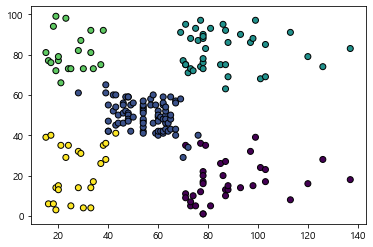

In [81]:
model = AgglomerativeClustering(linkage='average', affinity='euclidean', n_clusters=5)
cluster=model.fit_predict(df)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], linewidth = 1, c = cluster, edgecolor = 'black')
plt.show()

* **Complete Linkage**

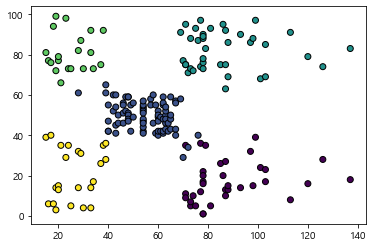

In [80]:
model = AgglomerativeClustering(linkage='complete', affinity='euclidean', n_clusters=5)
cluster=model.fit_predict(df)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], linewidth = 1, c = cluster, edgecolor = 'black')
plt.show()

* **Ward Linkage**

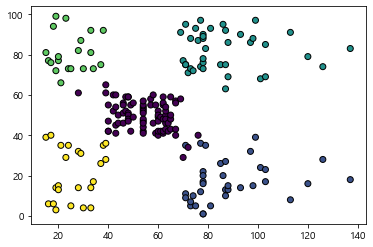

In [83]:
model = AgglomerativeClustering(linkage='ward', affinity='euclidean', n_clusters=5)
cluster=model.fit_predict(df)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], linewidth = 1, c = cluster, edgecolor = 'black')
plt.show()

Single Linkage로 거리 계산하는 것 이외에는 세가지 방식 모두 적합한 거리계산법으로 보여진다

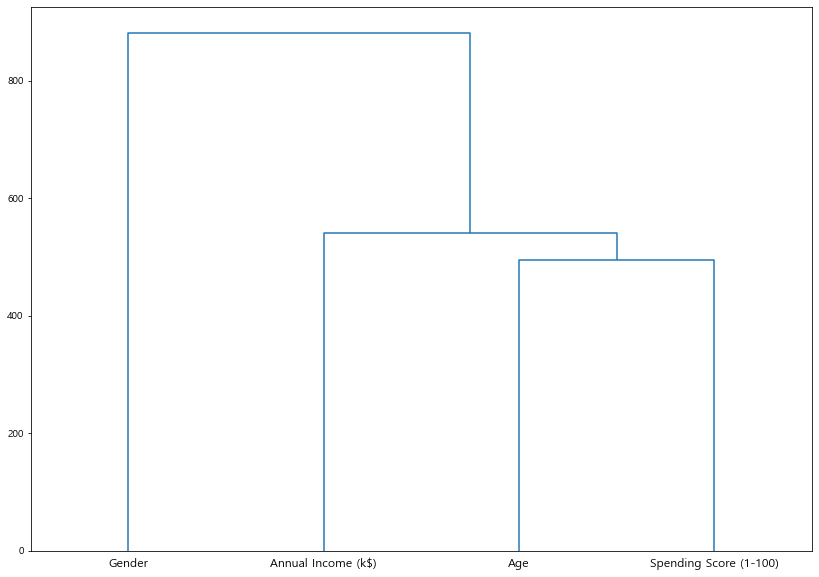

In [133]:
fig=plt.figure(figsize=(14,10))
linkage_matrix = linkage(df.T, method='ward', metric='euclidean')
_ = dendrogram(linkage_matrix, color_threshold = 5,labels=list(df.columns))

Age와 Spending Score 간의 군집화도 시도해봐야 할 것 같다.

### 2. KMeans Clustering

- **Annual Income & Spending Score**

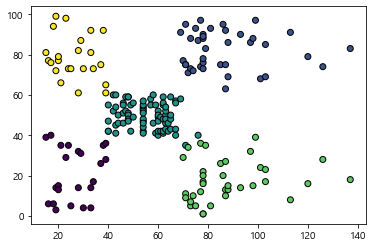

In [115]:
# 임금과 소비지수에서 KMeans 군집화 알고리즘도 분류를 잘하는 것을 확인할 수 있다.
model = KMeans(n_clusters=5, init='k-means++', max_iter=500, random_state=0)
cluster=model.fit_predict(df)
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], linewidth = 1, c = cluster, edgecolor = 'black')
plt.show()

#### KMeans Clustering 실루엣 계수 시각화 함수 만들기

In [121]:
# 클러스터별 평균 실루엣계수 시각화를 통한 클러스터 개수 최적화해보기
def visualize_silhouette(cluster_lists,X_features):
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples,silhouette_score
    import matplotlib.pyplot as plt
    import numpy as np
    import matplotlib.cm as cm
    import math
  
    n_cols=len(cluster_lists)
    fig,axs=plt.subplots(figsize=(4*n_cols,4),nrows=1,ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists):
        clusterer=KMeans(n_clusters=n_cluster,max_iter=500,random_state=0)
        cluster_labels=clusterer.fit_predict(X_features)
    
        sil_avg=silhouette_score(X_features,cluster_labels)
        sil_values=silhouette_samples(X_features,cluster_labels)
    
        y_lower=10
        axs[ind].set_title('Number of Cluster:'+str(n_cluster)+
                       '\nSilhouette Score:'+str(round(sil_avg,3)))
        axs[ind].set_xlabel('The silhouette coefficient values')
        axs[ind].set_ylabel('Cluster label')
        axs[ind].set_xlim([-0.1,1])
        axs[ind].set_ylim([0,len(X_features)+(n_cluster+1)*10])
        axs[ind].set_yticks([])
        axs[ind].set_xticks([0,0.2,0.4,0.6,0.8,1])

        for i in range(n_cluster):
            ith_cluster_sil_values=sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()

            size_cluster_i=ith_cluster_sil_values.shape[0]
            y_upper=y_lower+size_cluster_i

            color=cm.nipy_spectral(float(i)/n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower,y_upper),0,ith_cluster_sil_values,
                             facecolor=color,edgecolor=color,alpha=0.7)
            axs[ind].text(-0.05,y_lower+0.5*size_cluster_i,str(i))
            y_lower=y_upper+10
            axs[ind].axvline(x=sil_avg,color='red',linestyle='--')

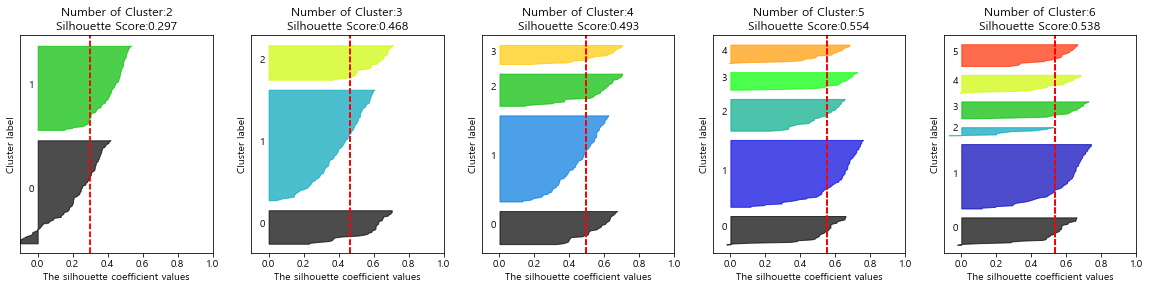

In [136]:
# 임금과 소비점수 간의 실루엣 계수 시각화
visualize_silhouette([2,3,4,5,6],df[['Annual Income (k$)','Spending Score (1-100)']])

위 실루엣 계수 시각화를 보았을 때, 4개 이하의 군집은 타 군집에 비해 많이 뭉쳐있으며, 6개의 군집의 경우, 2번의 군집의 경우, 모두 평균보다 떨어지는 실루엣계수를 가지고 있다. 따라서, 5개의 군집이 배분도 잘되었으며 모든 군집이 평균 이상의 실루엣 계수를 가지고 있어 가장 이상적이라고 볼 수 있다.

- **Age & Spending Score**

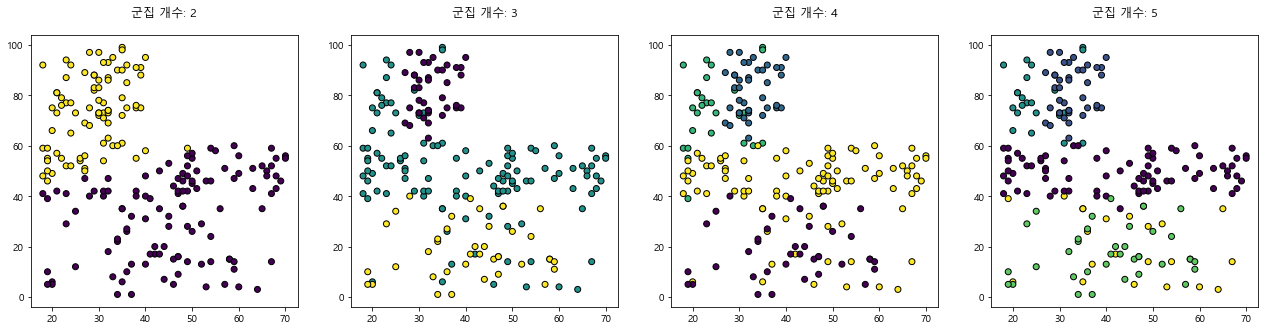

In [238]:
fig=plt.figure(figsize=(22,5))
# gender
for i,clus in enumerate([2,3,4,5]):
    plt.subplot(1,4,i+1)
    plt.title(f'군집 개수: {clus}\n')
    model = KMeans(n_clusters=clus, random_state=88)
    cluster=model.fit_predict(df)
    plt.scatter(df['Age'], df['Spending Score (1-100)'], linewidth = 1, c = cluster, edgecolor = 'black')
plt.show()

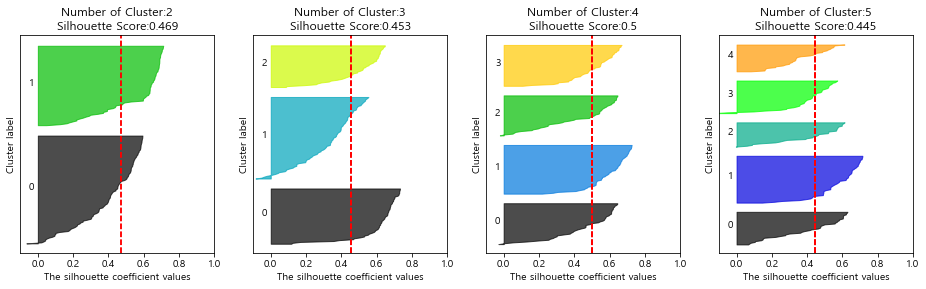

In [170]:
# 나이와 소비점수 간의 실루엣 계수 시각화
visualize_silhouette([2,3,4,5],df[['Age','Spending Score (1-100)']])

전반적으로 비교하면 실루엣 계수가 가장 높은 4개의 군집화가 가장 잘되었다고 볼 수 있다. 그렇지만 나이대에 따른 소비성향이라는 해석에 있어 좋은 군집화가 이루어졌다고 보기에 아쉬움이 남는다. 데이터의 산점도를 고려하면 밀도 기반의 DBSCAN 알고리즘을 사용하면 좀 더 나은 군집화를 해볼 수 있을 것 같다.

### 3. DBSCAN

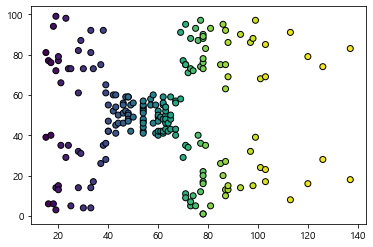

In [227]:
dbscan=DBSCAN(eps=0.09,min_samples=1)
dbscan_labels=dbscan.fit_predict(df)
plt.scatter(df.iloc[:,2], df.iloc[:,3], linewidth = 1, c = dbscan_labels, edgecolor = 'black')

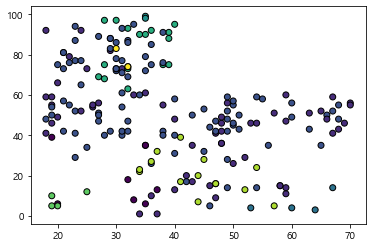

In [235]:
dbscan=DBSCAN(eps=0.2,min_samples=2)
dbscan_labels=dbscan.fit_predict(df_scaled)
plt.scatter(df.iloc[:,1], df.iloc[:,3], linewidth = 1, c = dbscan_labels, edgecolor = 'black')

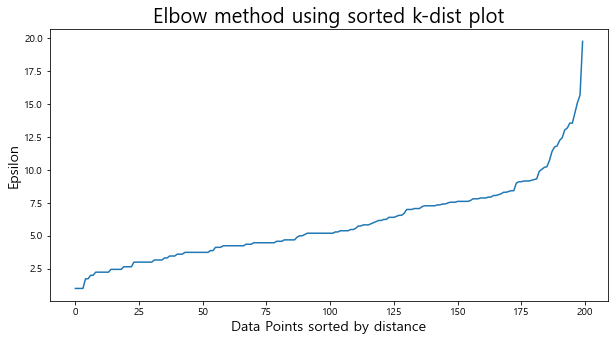

In [230]:
from sklearn.neighbors import NearestNeighbors
import numpy as np

nn = NearestNeighbors(n_neighbors=2)
neighbors = nn.fit(df)
distances, indices = neighbors.kneighbors(df)

distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.figure(figsize=(10,5))
plt.plot(distances)
plt.title('Elbow method using sorted k-dist plot',fontsize=20) # K-distance Graph
plt.xlabel('Data Points sorted by distance',fontsize=14)
plt.ylabel('Epsilon',fontsize=14)
plt.show()

### 한계점
- 생각했던 것과 달리, DBSCAN 알고리즘이 좋은 성능을 보이지 못하고 있어 아쉬움이 남는다. 
- plotly.express.scatter_3d로 3차원 시각화를 해보려 했으나 시간 부족으로 다음에 해봐야 할 것 같다.